In [1]:
# Dependencies and Setup
%matplotlib inline
from config import gkey
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
from scipy.stats import pearsonr
from numpy import cov
from scipy import stats


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
population = pd.read_csv("Resources/Census-Data-by-Chicago-Community-Area-2016.csv")
potholes = pd.read_csv("Resources/311_Service_Requests_-_Pot_Holes_Reported_-_Historical-2016.csv")

crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")
parks = pd.read_csv("Resources/CPD_Parks.csv")
sociecn = pd.read_csv("Resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")
sociecn = sociecn[:-1]
sociecn['Community Area Number'] = sociecn['Community Area Number'].astype(int)
sociecn = sociecn.rename(columns = {'Community Area Number':'Community Area'})


In [2]:
potholes.head()
potholes_df=pd.DataFrame(potholes)

In [3]:
potholes_df=potholes.groupby(['Community Area'], as_index=False)

potholes_group=potholes_df.count()

potholes_group.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
0,0.0,149,149,149,149,149,82,82,83,149,91,149,149,149,149,1,148,148,148
1,1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3,3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4,4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632


In [4]:
#Drop non neighborhood (Community zero 0)

potholes_group = potholes_group.drop(potholes_group.index[0])

In [5]:
potholes_group.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION
1,1.0,701,701,701,701,701,355,355,353,701,701,701,701,701,701,321,701,701,701
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,1603,1603,1603,1603,1603,142,1603,1603,1603
3,3.0,485,485,485,485,485,373,373,376,485,485,485,485,485,485,314,485,485,485
4,4.0,632,632,632,632,632,412,412,411,632,632,632,632,632,632,228,632,632,632
5,5.0,633,633,633,633,633,431,431,431,633,633,633,633,633,633,256,633,633,633


In [6]:
crime=crime[['Ward','Community Area','Domestic']]
community_crime=crime.groupby(['Community Area', 'Domestic'], as_index=False)
crime_group=community_crime.count()
crime_group.head()

,Community Area,Domestic,Ward
0,1,False,752
1,1,True,117
2,2,False,773
3,2,True,95
4,3,False,763


In [7]:

population.head()

,Community,Community Area,population
0,Rogers Park,1,54402
1,West Ridge,2,72211
2,Uptown,3,55137
3,Lincoln Square,4,40761
4,North Center,5,34623


In [8]:
merged_df=potholes_group.merge(population, on='Community Area', how='left')


In [9]:
merged_df.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,X COORDINATE,Y COORDINATE,Ward,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population
0,1.0,701,701,701,701,701,355,355,353,701,...,701,701,701,701,321,701,701,701,Rogers Park,54402
1,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,1603,1603,142,1603,1603,1603,West Ridge,72211
2,3.0,485,485,485,485,485,373,373,376,485,...,485,485,485,485,314,485,485,485,Uptown,55137
3,4.0,632,632,632,632,632,412,412,411,632,...,632,632,632,632,228,632,632,632,Lincoln Square,40761
4,5.0,633,633,633,633,633,431,431,431,633,...,633,633,633,633,256,633,633,633,North Center,34623


In [10]:
merged_df=merged_df.merge(crime_group, on="Community Area", how='left')
merged_df=merged_df.rename(columns={'Ward_y':'Crime Count'})

In [11]:
merged_df.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,Ward_x,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Domestic,Crime Count
0,1.0,701,701,701,701,701,355,355,353,701,...,701,701,321,701,701,701,Rogers Park,54402,False,752
1,1.0,701,701,701,701,701,355,355,353,701,...,701,701,321,701,701,701,Rogers Park,54402,True,117
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,142,1603,1603,1603,West Ridge,72211,False,773
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,142,1603,1603,1603,West Ridge,72211,True,95
4,3.0,485,485,485,485,485,373,373,376,485,...,485,485,314,485,485,485,Uptown,55137,False,763


In [12]:
merged_df['Crime Count Adjusted']=merged_df['Crime Count']/merged_df['population']

In [13]:
merged_df.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,Police District,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Domestic,Crime Count,Crime Count Adjusted
0,1.0,701,701,701,701,701,355,355,353,701,...,701,321,701,701,701,Rogers Park,54402,False,752,0.013823
1,1.0,701,701,701,701,701,355,355,353,701,...,701,321,701,701,701,Rogers Park,54402,True,117,0.002151
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,142,1603,1603,1603,West Ridge,72211,False,773,0.010705
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,142,1603,1603,1603,West Ridge,72211,True,95,0.001316
4,3.0,485,485,485,485,485,373,373,376,485,...,485,314,485,485,485,Uptown,55137,False,763,0.013838


In [14]:
merged_df['Pothole Count Adjusted']=merged_df['CREATION DATE']/merged_df['population']

In [15]:

merged_df.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Domestic,Crime Count,Crime Count Adjusted,Pothole Count Adjusted
0,1.0,701,701,701,701,701,355,355,353,701,...,321,701,701,701,Rogers Park,54402,False,752,0.013823,0.012886
1,1.0,701,701,701,701,701,355,355,353,701,...,321,701,701,701,Rogers Park,54402,True,117,0.002151,0.012886
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,142,1603,1603,1603,West Ridge,72211,False,773,0.010705,0.022199
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,142,1603,1603,1603,West Ridge,72211,True,95,0.001316,0.022199
4,3.0,485,485,485,485,485,373,373,376,485,...,314,485,485,485,Uptown,55137,False,763,0.013838,0.008796


In [16]:
covariance=cov(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
covariance

array([[ 1.85131503e-04, -7.54334427e-06],
       [-7.54334427e-06,  1.03366876e-04]])

In [17]:
corr, _ = pearsonr(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.055


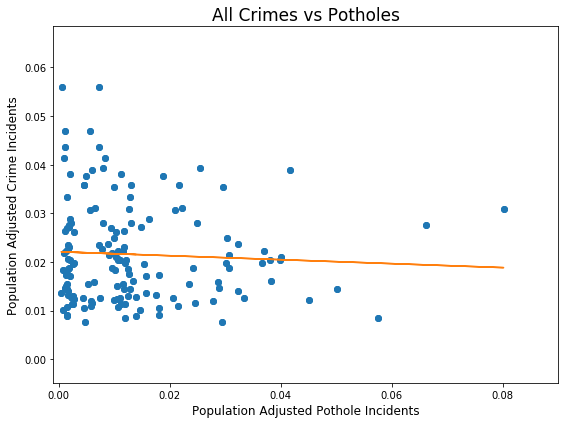

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('All Crimes vs Potholes',fontsize=17)
ax.set_ylabel('Population Adjusted Crime Incidents',fontsize=12)
ax.set_xlabel('Population Adjusted Pothole Incidents',fontsize=12)
plt.scatter(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
line = slope*merged_df['Crime Count Adjusted']+intercept
plt.plot(merged_df['Crime Count Adjusted'], merged_df['Pothole Count Adjusted'],'o',merged_df['Crime Count Adjusted'] , line)
ax.set_xlim(xmin=-.001, xmax=.09)
fig.tight_layout()
plt.savefig('CrimeVsPotholes.png')
plt.show()


In [19]:
crime.head()

,Ward,Community Area,Domestic
0,41,76,False
1,34,49,False
2,42,32,True
3,32,6,False
4,6,69,True


In [20]:
crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")

In [21]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [22]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10819224,JA119772,12/31/2016 11:59:00 PM,100XX W OHARE ST,810,THEFT,OVER $500,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,False,False,...,41,76,6,1100658.0,1934241.0,2016,02/10/2018 03:50:01 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)"
1,10801137,JA100016,12/31/2016 11:58:00 PM,0000X W 113TH PL,430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE,False,False,...,34,49,04B,1178014.0,1829709.0,2016,02/10/2018 03:50:01 PM,41.688033,-87.623931,"(41.688033246, -87.623931468)"
2,10802006,JA100012,12/31/2016 11:55:00 PM,0000X E WACKER PL,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOTEL/MOTEL,False,True,...,42,32,08B,1176964.0,1902140.0,2016,02/10/2018 03:50:01 PM,41.886815,-87.625593,"(41.886814897, -87.625592678)"
3,10801110,JA100027,12/31/2016 11:55:00 PM,030XX N LINCOLN AVE,2250,LIQUOR LAW VIOLATION,LIQUOR LICENSE VIOLATION,RESIDENCE,True,False,...,32,6,22,1166154.0,1920300.0,2016,01/07/2017 03:56:13 PM,41.936885,-87.664770,"(41.936884881, -87.66476981)"
4,10801865,JA100839,12/31/2016 11:54:00 PM,078XX S INDIANA AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,...,6,69,14,1178949.0,1853139.0,2016,02/10/2018 03:50:01 PM,41.752307,-87.619798,"(41.752307019, -87.619797619)"


In [23]:
crime=crime[['Ward','Community Area','Domestic']]
community_crime2=crime.groupby(['Community Area', 'Domestic'], as_index=False)
crime_group2=community_crime2.count()
crime_group2.head()

,Community Area,Domestic,Ward
0,1,False,752
1,1,True,117
2,2,False,773
3,2,True,95
4,3,False,763


In [24]:
crime_group2=crime_group2.sort_values(by= ['Domestic', 'Community Area'], ascending=True)

In [25]:
crime_group2 = crime_group2.drop(crime_group2.index[0:77])

In [26]:
crime_group2.head()

,Community Area,Domestic,Ward
1,1,True,117
3,2,True,95
5,3,True,84
7,4,True,57
9,5,True,23


In [27]:
merged_df.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community,population,Domestic,Crime Count,Crime Count Adjusted,Pothole Count Adjusted
0,1.0,701,701,701,701,701,355,355,353,701,...,321,701,701,701,Rogers Park,54402,False,752,0.013823,0.012886
1,1.0,701,701,701,701,701,355,355,353,701,...,321,701,701,701,Rogers Park,54402,True,117,0.002151,0.012886
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,142,1603,1603,1603,West Ridge,72211,False,773,0.010705,0.022199
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,142,1603,1603,1603,West Ridge,72211,True,95,0.001316,0.022199
4,3.0,485,485,485,485,485,373,373,376,485,...,314,485,485,485,Uptown,55137,False,763,0.013838,0.008796


In [28]:
merged_df=merged_df.merge(crime_group2, on="Community Area", how='left')

In [29]:
merged_df.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,LONGITUDE,LOCATION,Community,population,Domestic_x,Crime Count,Crime Count Adjusted,Pothole Count Adjusted,Domestic_y,Ward
0,1.0,701,701,701,701,701,355,355,353,701,...,701,701,Rogers Park,54402,False,752,0.013823,0.012886,True,117
1,1.0,701,701,701,701,701,355,355,353,701,...,701,701,Rogers Park,54402,True,117,0.002151,0.012886,True,117
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,West Ridge,72211,False,773,0.010705,0.022199,True,95
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,West Ridge,72211,True,95,0.001316,0.022199,True,95
4,3.0,485,485,485,485,485,373,373,376,485,...,485,485,Uptown,55137,False,763,0.013838,0.008796,True,84


In [30]:
merged_df=merged_df.rename(columns={'Ward':'Domestic Crime Count'})

In [31]:
merged_df.head()


,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,LONGITUDE,LOCATION,Community,population,Domestic_x,Crime Count,Crime Count Adjusted,Pothole Count Adjusted,Domestic_y,Domestic Crime Count
0,1.0,701,701,701,701,701,355,355,353,701,...,701,701,Rogers Park,54402,False,752,0.013823,0.012886,True,117
1,1.0,701,701,701,701,701,355,355,353,701,...,701,701,Rogers Park,54402,True,117,0.002151,0.012886,True,117
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,West Ridge,72211,False,773,0.010705,0.022199,True,95
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,1603,West Ridge,72211,True,95,0.001316,0.022199,True,95
4,3.0,485,485,485,485,485,373,373,376,485,...,485,485,Uptown,55137,False,763,0.013838,0.008796,True,84


In [32]:
merged_df['Domestic Crime Count Adjusted']=merged_df['Domestic Crime Count']/merged_df['population']

In [33]:
merged_df.head()

,Community Area,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,...,LOCATION,Community,population,Domestic_x,Crime Count,Crime Count Adjusted,Pothole Count Adjusted,Domestic_y,Domestic Crime Count,Domestic Crime Count Adjusted
0,1.0,701,701,701,701,701,355,355,353,701,...,701,Rogers Park,54402,False,752,0.013823,0.012886,True,117,0.002151
1,1.0,701,701,701,701,701,355,355,353,701,...,701,Rogers Park,54402,True,117,0.002151,0.012886,True,117,0.002151
2,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,West Ridge,72211,False,773,0.010705,0.022199,True,95,0.001316
3,2.0,1603,1603,1603,1603,1603,776,776,773,1603,...,1603,West Ridge,72211,True,95,0.001316,0.022199,True,95,0.001316
4,3.0,485,485,485,485,485,373,373,376,485,...,485,Uptown,55137,False,763,0.013838,0.008796,True,84,0.001523


In [34]:
corr, _ = pearsonr(merged_df['Domestic Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.035


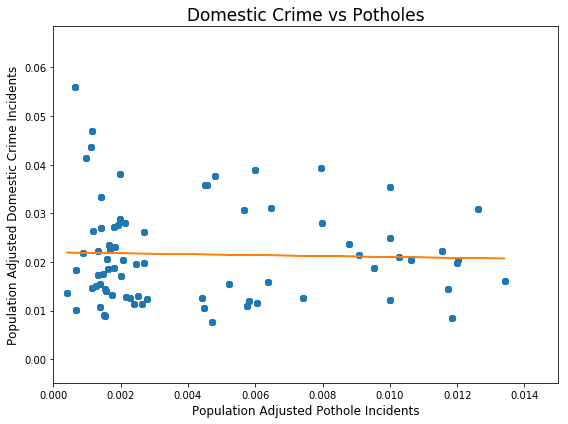

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Domestic Crime vs Potholes', fontsize=17)
ax.set_ylabel('Population Adjusted Domestic Crime Incidents',fontsize=12)
ax.set_xlabel('Population Adjusted Pothole Incidents',fontsize=12)
plt.scatter(merged_df['Domestic Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df['Domestic Crime Count Adjusted'], merged_df['Pothole Count Adjusted'])
line = slope*merged_df['Domestic Crime Count Adjusted']+intercept
plt.plot(merged_df['Domestic Crime Count Adjusted'], merged_df['Pothole Count Adjusted'],'o',merged_df['Domestic Crime Count Adjusted'] , line)
fig.tight_layout()
ax.set_xlim(xmin=.0, xmax=.015)
plt.savefig('DomesticCrimeVsPotholes.png')
plt.show()
